# Introduction to neural network classification in TensorFlow

+ Binary Classification
+ Multiclass Classification
+ Multilabel Classification

## Creating data to view and fit



In [3]:
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [4]:
# BINARY CLASSIFICATION--
# Visualize
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "labal":y})
circles

,X0,X1,labal
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


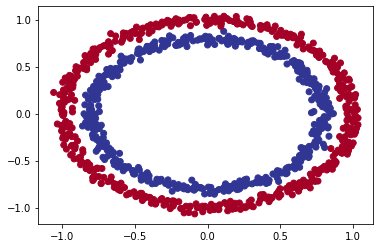

In [5]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Basic model

import tensorflow as tf

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [7]:
# Improving model 

import tensorflow as tf

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [8]:
# Adding layers
 
import tensorflow as tf

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model_2.fit(X,y,epochs=200, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

In [9]:
# Adding more dense neurons

# Improving model 

import tensorflow as tf

tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
model_3.fit(X,y,epochs=100, verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

In [10]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


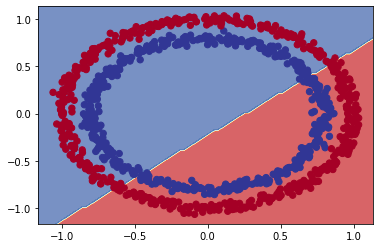

In [11]:
# Check out model_3  by visualizing

plot_decision_boundary(
    model=model_3,
    X=X,
    y=y
)

In [12]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history=model_4.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/100
32/32 [=

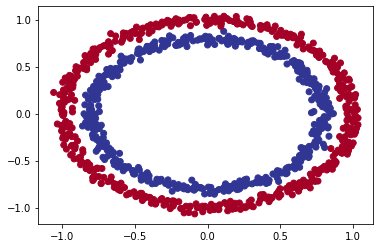

In [13]:
# Chek out data

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


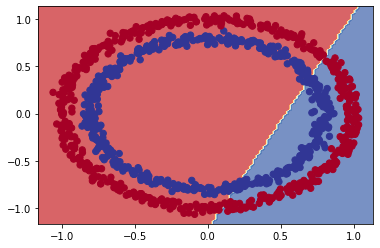

In [14]:
# Check model_4's preds

plot_decision_boundary(
    model=model_4,
    X=X,
    y=y
)

## Building a Neural netweokr with non-linear activation function

In [15]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history=model_5.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/100
32/32 [=

In [16]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history=model_5.fit(X,y,epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/250
32/32 [=

doing binary classification


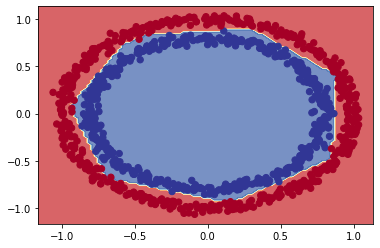

In [17]:
plot_decision_boundary(
    model=model_5,
    X=X,
    y=y,
)

## Modeling activation functions on plots

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>, [<matplotlib.lines.Line2D at 0x7fd986c038d0>])

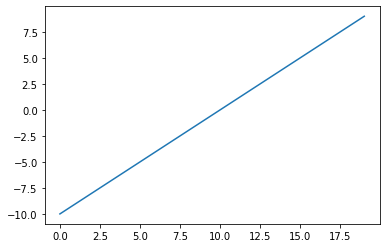

In [18]:
## Sigmoid

A=tf.cast(tf.range(-10,10), tf.float32)
A,plt.plot(A),

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>, [<matplotlib.lines.Line2D at 0x7fd986c7b0d0>])

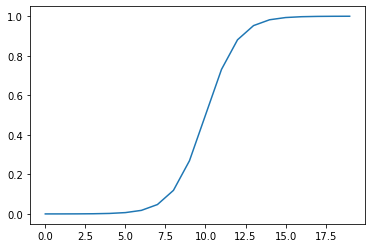

In [19]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A), plt.plot(sigmoid(A))

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>,
 [<matplotlib.lines.Line2D at 0x7fd986b1e690>])

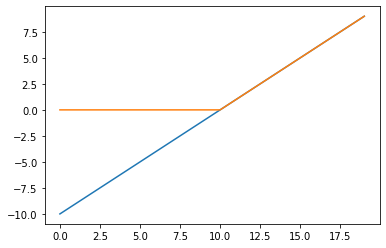

In [20]:
# Relu- Rectified linear unit
def relu(x):
  return tf.maximum(0,x)

relu(A), plt.plot(A), plt.plot(relu(A))

## Evaluating and imroving our classification model

In [21]:
# Split into train and test sets

X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [22]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history=model_8.fit(X,y,epochs=25)

Epoch 1/25
32/32 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/25
32/32 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/25
32/32 [

In [23]:
# Evaluate the mdoel on test data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9900


[0.09631657600402832, 0.9900000095367432]

doing binary classification


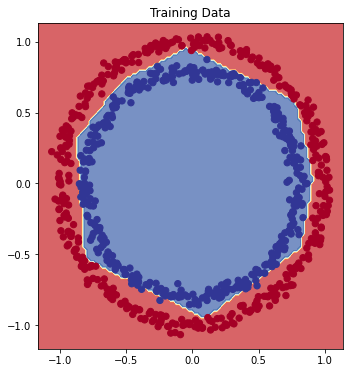

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(
    model=model_8,
    X=X_train,
    y=y_train,
)




doing binary classification


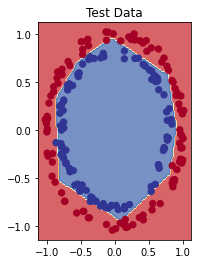

In [25]:
plt.subplot(1,2,1)
plt.title("Test Data")
plot_decision_boundary(
    model=model_8,
    X=X_test,
    y=y_test,
)

## Plot the loss (or training) curves

Text(0.5, 1.0, 'Model_8 Loss curve')

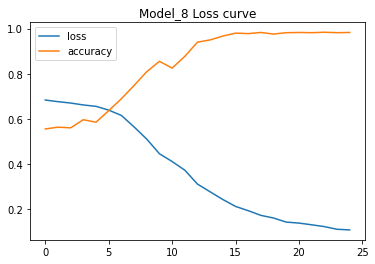

In [26]:
# Convert the history object to a DataFrame
pd.DataFrame(history.history), pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curve")

## Finding the optimal learning rate for our model

In [27]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history=model_9.fit(X,y,epochs=25)

# Create a learning rate callback
lr_scheduler =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 **(epoch/20))

# Fit the model using the lr scheduler call back

history_9=model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/25
32/32 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/25
32/32 [

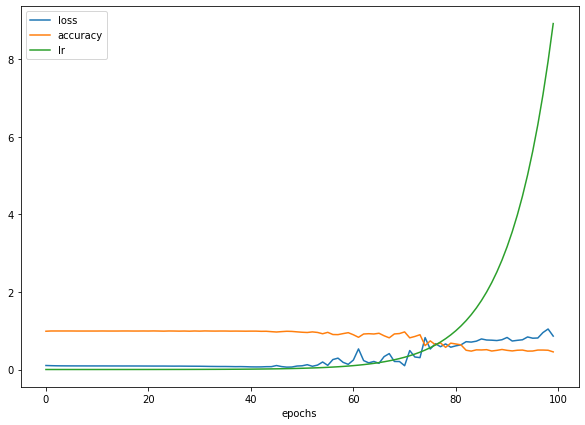

In [28]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

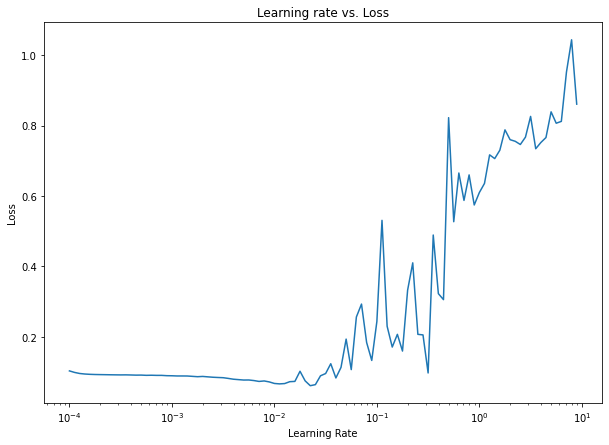

In [29]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [30]:
# Using ideal lr on the model

tf.random.set_seed(42)

model_10=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history=model_10.fit(X,y,epochs=25)


history_10=model_10.fit(
    X_train,
    y_train,
    epochs=20,
)

Epoch 1/25
32/32 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.5680
Epoch 2/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5800
Epoch 3/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6120
Epoch 4/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.7930
Epoch 5/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7850
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8910
Epoch 7/25
32/32 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9200
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9560
Epoch 9/25
32/32 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9820
Epoch 10/25
32/32 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9850
Epoch 11/25
32/32 [

## Creating a confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds=model_10.predict(X_test)
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [32]:
y_preds[:10]
## Our predictions have come out in prediction probability forms:

array([[9.9999189e-01],
       [1.0000000e+00],
       [9.9996483e-01],
       [9.9999344e-01],
       [7.8988791e-01],
       [1.9641463e-03],
       [9.9839491e-01],
       [1.4028643e-03],
       [9.9999988e-01],
       [2.9336263e-06]], dtype=float32)

In [33]:
# Convert prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [35]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]])

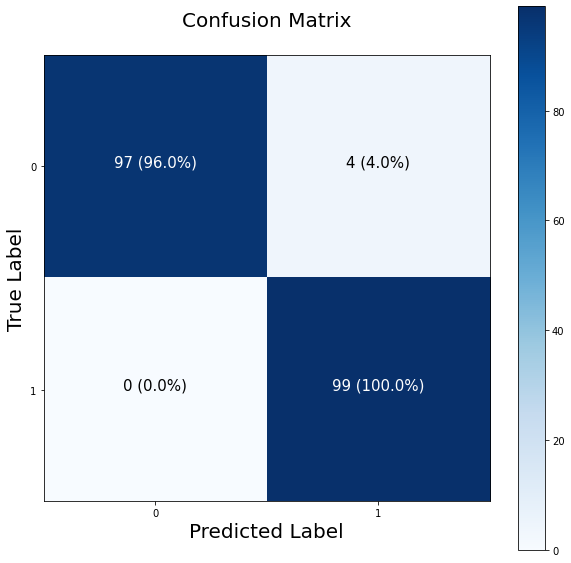

In [34]:
# Prettify confusion matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)


ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with larger example with Multiclass classification  

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data alredy sorted to training and test data sets
(train_data, train_labels), (test_data, test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [37]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n") #label=specific class in multiclass classification

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [38]:
# Checking the shapes
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Class: 9


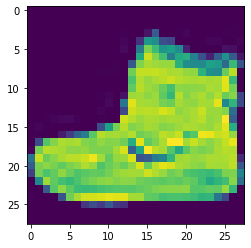

In [39]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])
print(f"Class: {train_labels[0]}")

Class: 2


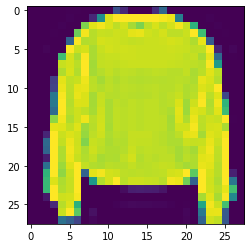

In [40]:
plt.imshow(train_data[7])
print(f"Class: {train_labels[7]}")

In [41]:
# Index our training labels

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

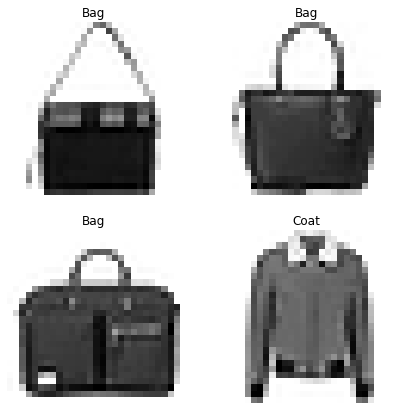

In [42]:
# Plot multiple random images of random MNIST
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

+ Input shape= 28 x 28
+ Output shape=10
+ loss func: Categorical Cross Entropy (Sparse Categorical Cross Entropy if not one-hot-encoded)
+ Output layer activation: Softmax

In [43]:
# Not one hot encoded
tf.random.set_seed(42)


model_11=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)), 
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history=model_11.fit(
    x=train_data,
    y=train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [44]:
# One hot encoded
tf.random.set_seed(42)


model_11=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)), 
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history=model_11.fit(
    x=train_data,
    y=tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [45]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Normalizing our data

train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [47]:
# Using normalized data on neural networks, not one-hot-encoded

# One hot encoded
tf.random.set_seed(42)


model_11=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)), 
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history=model_11.fit(
    x=train_data_norm,
    y=train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

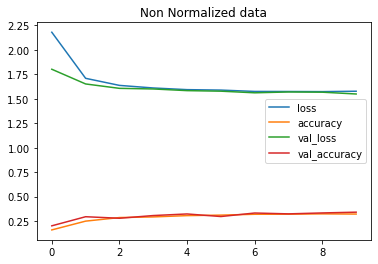

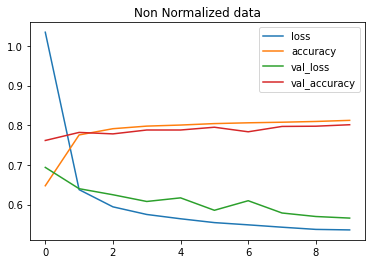

In [48]:
# Plot non-normalized data loss curves

import pandas
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized data")
pd.DataFrame(norm_history.history).plot(title="Non Normalized data")

## Finding the idead learning rate

In [49]:
# Using normalized data on neural networks, not one-hot-encoded

# One hot encoded
tf.random.set_seed(42)


model_13=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)), 
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, tf.keras.activations.relu),
                              tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history=model_13.fit(
    x=train_data_norm,
    y=train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

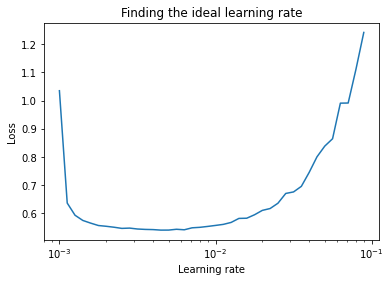

In [51]:
# Plot learninf rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [52]:
# Use ideal learning_rate
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                       
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating multiclass classification model

In [53]:
# Create a confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [65]:
# Make predictions with our model
y_probs=model_14.predict(test_data_norm)

# First five preds
y_probs[:5]

array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

In [59]:
y_probs[0], tf.argmax(y_probs[0])

(array([8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [60]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [66]:
# Convert all pred probabilities to integers

y_preds=y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [67]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

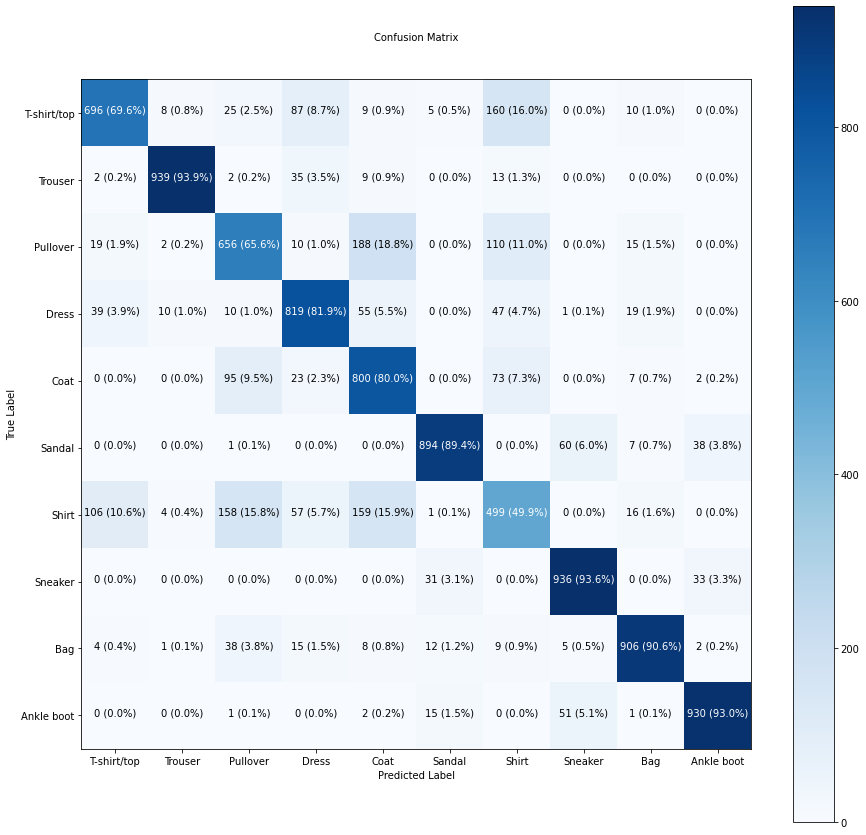

In [69]:
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(15,15),
    text_size=10
)

In [73]:
import random

def plot_random_image(model, images, true_labels, classes):
  "Picks a random img, plots it abd lavels it with a truth and a pred label"

  i=random.randint(0,len(images))

  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) 

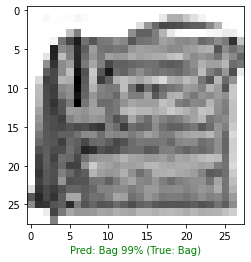

In [80]:
# Check a random img and its pred

plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [81]:
model_14.layers

In [83]:
# Extract a paticular layer
model_14.layers[1]

In [85]:
# Get the patterns of a layer in our network

weights, biases=model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

## Bias Vector

In [87]:
# Bias and Biases shapes

biases, biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

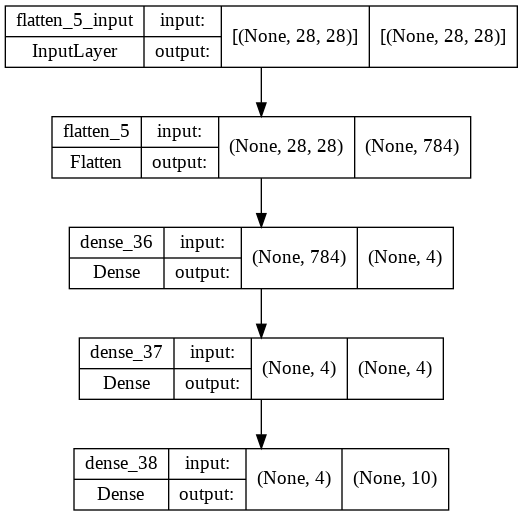

In [88]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)